In [24]:
#import libraries
import torch
from torch import nn


import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader


import matplotlib.pyplot as plt

# Data preparation and loading

In [25]:
#training and test data

training_data = torchvision.datasets.FashionMNIST( root="data",
                                                  train = True,
                                                  download=True,
                                                  transform=ToTensor(),
                                                  target_transform= None
)

test_data = torchvision.datasets.FashionMNIST(root="data",
                                 train = False,
                                 download=True,
                                 transform = ToTensor(),
                                 
)

In [26]:
#view the returned data, we know data type is tuple
#returns image, index

image, label = training_data[5]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0863, 0.3451, 0.7373, 0.6745, 0.5176, 0.4902, 0.5529,
           0.7804, 0.5608, 0.0353, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0784, 0.5137,
           0.7804, 0.8078, 0.7686, 0.7922, 0.9490, 1.0000, 1.0000, 0.9804,
           0.8706, 0.7725, 0.8078, 0.7373, 0.4941, 0.0667, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.1373, 0.8392, 0.7490,
           0.7176, 0.6980, 0.6863, 0.6588, 0.5882, 0.6353, 0.6235, 0.5961,
           0.6196, 0.7020, 0.7176, 0.7412, 0.7647, 0.7255, 0.3216, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6667, 0.7451, 0.6745,
           0.6941, 0.6902, 0.6706, 0.6627, 0.6353, 0.6078, 0.5804, 0.6039,
           0.6627, 0.6824, 0.6863, 0.6863, 

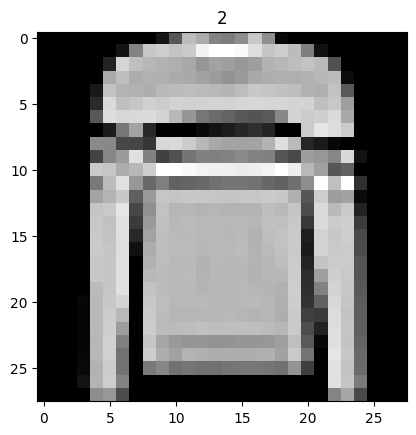

In [27]:
plt.plot(figsize=(6,7))
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"{label}")
plt.show()

In [28]:
len(training_data), len(test_data)

(60000, 10000)

In [29]:
image.shape


torch.Size([1, 28, 28])

In [31]:
class_name = training_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

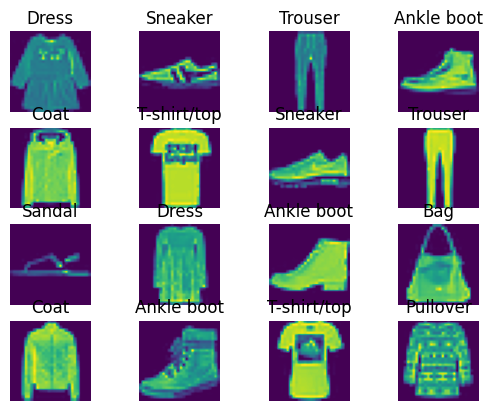

In [34]:
#multiple image plots

fig = plt.figure()
#number of rows and cols
rows, cols = 4, 4

for i in range(1, rows*cols +1):
    random_img = torch.randint(0, len(training_data), size=[1]).item()
    img, label = training_data[random_img]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze())
    plt.axis(False)
    plt.title(class_name[label])



In [37]:
#Dataloader breaking the data to batches for computationaö efficiency
#general mutliples of twos are preferred

training_data_batch = DataLoader(training_data,
                                 batch_size=32,
                                 shuffle=True)

test_data_batch = DataLoader(test_data,
                             batch_size=32,
                             shuffle=True)

print(f"The length of the training batch: {len(training_data_batch)} and test data batch are: {len(test_data_batch)}")

The length of the training batch: 1875 and test data batch are: 313


In [40]:
#the properties of the training batch

training_data_features, training_data_labels = next(iter(training_data_batch))
training_data_features.shape, training_data_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

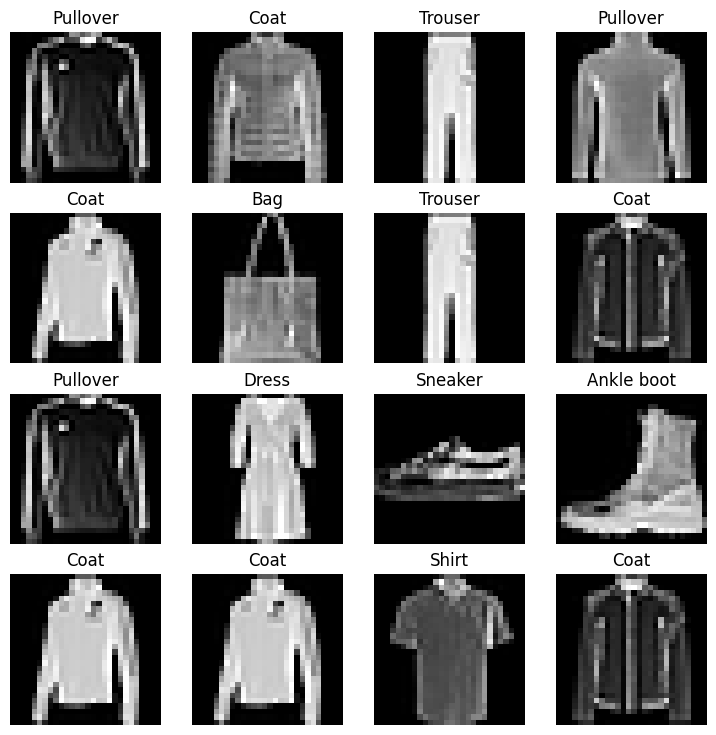

In [49]:
#plot some of the data from the batches
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))

rows, cols = 4,4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(training_data_features), size=[1]).item()
    random_img_idx, random_label_idx = training_data_features[random_idx], training_data_labels[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(random_img_idx.squeeze(), cmap='gray')
    plt.axis(False)
    plt.title(f"{class_name[random_label_idx]}")
    


##Building baseline model

In [54]:
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_layer: int, output_shape: int):
        super().__init__()
        self.layer_one = nn.Sequential(
                                        nn.Flatten(),
                                        nn.Linear(in_features=input_shape, out_features=hidden_layer),
                                        nn.Linear(in_features=hidden_layer, out_features=output_shape),                                        
        )

    ##define forward method

    def forward(self, x):
        return self.layer_one(x)
 

In [56]:
#create object of the class
model_0 = FashionMNISTModel(784, 10, len(class_name))

model_0.to('cpu')

FashionMNISTModel(
  (layer_one): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)